In [1]:
# Calling librarries

import pandas as pd
import numpy as np
import klib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df=pd.read_csv("Car price.csv")

In [3]:
df.head(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  object
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod. year        19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  object
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  object
 11  Cylinders         19237 non-null  int64 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Doors             19237 non-null  object
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

In [4]:
# Data cleaning with klib (remove duplicated rows and increasing memory usage of datset)

df=klib.data_cleaning(df)

Shape of cleaned data: (18924, 18) - Remaining NAs: 0


Dropped rows: 313
     of which 313 duplicates. (Rows (first 150 shown): [425, 1581, 1697, 1972, 2131, 2268, 2373, 2437, 2450, 2923, 2968, 3026, 3383, 3433, 3525, 3598, 3604, 3859, 3919, 4035, 4182, 4278, 4298, 4398, 4403, 4509, 4732, 4752, 4756, 4862, 4984, 5121, 5174, 5194, 5246, 5328, 5331, 5350, 5354, 5455, 5477, 5572, 5653, 5716, 5778, 5919, 5942, 5989, 6030, 6037, 6071, 6101, 6120, 6138, 6189, 6249, 6291, 6732, 6776, 6847, 6849, 6871, 7035, 7112, 7138, 7269, 7274, 7347, 7406, 7411, 7444, 7796, 7814, 7838, 7848, 7850, 7932, 7944, 7949, 7986, 8177, 8240, 8281, 8437, 8495, 8590, 8657, 8717, 8730, 8765, 9059, 9081, 9120, 9196, 9274, 9275, 9301, 9399, 9779, 9799, 9816, 9824, 9847, 9921, 9965, 9987, 10078, 10081, 10143, 10152, 10264, 10309, 10338, 10339, 10442, 10457, 10513, 10536, 10542, 10604, 10825, 10915, 10925, 10973, 10976, 11020, 11029, 11162, 11209, 11499, 11525, 11528, 11578, 11698, 11729, 11988, 12021, 12025, 12053, 1207

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18924 entries, 0 to 18923
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                18924 non-null  int32   
 1   price             18924 non-null  int32   
 2   levy              18924 non-null  category
 3   manufacturer      18924 non-null  category
 4   model             18924 non-null  string  
 5   prod_year         18924 non-null  int16   
 6   category          18924 non-null  category
 7   leather_interior  18924 non-null  category
 8   fuel_type         18924 non-null  category
 9   engine_volume     18924 non-null  category
 10  mileage           18924 non-null  string  
 11  cylinders         18924 non-null  int8    
 12  gear_box_type     18924 non-null  category
 13  drive_wheels      18924 non-null  category
 14  doors             18924 non-null  category
 15  wheel             18924 non-null  category
 16  color             1892

# Data processing

In [7]:
# Finding missing values

df.isnull().sum()

id                  0
price               0
levy                0
manufacturer        0
model               0
prod_year           0
category            0
leather_interior    0
fuel_type           0
engine_volume       0
mileage             0
cylinders           0
gear_box_type       0
drive_wheels        0
doors               0
wheel               0
color               0
airbags             0
dtype: int64

In [5]:
# selecting categorical columns and numerical columns

categorical_col=df.select_dtypes(include=["string","category"]).columns.tolist()
print(f"CATEGORICAL COLUMNS:\n{categorical_col}")
print(f"TOTAL NUMBER OF CATEGORICAL COLUMNS: {len(categorical_col)}") # object tipli ustunlarni umumiy soni

numerical_col=df.select_dtypes(include=["int8","int16","int32"]).columns.tolist()
print(f"\nNUMERICAL COLUMNS:{numerical_col}")
print(f"TOTAL NUMBER OF NUMERICAL COLUMNS:{len(numerical_col)}") # int va float tipidagi ustunlarni umumiy soni

CATEGORICAL COLUMNS:
['levy', 'manufacturer', 'model', 'category', 'leather_interior', 'fuel_type', 'engine_volume', 'mileage', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color']
TOTAL NUMBER OF CATEGORICAL COLUMNS: 13

NUMERICAL COLUMNS:['id', 'price', 'prod_year', 'cylinders', 'airbags']
TOTAL NUMBER OF NUMERICAL COLUMNS:5


In [9]:
df["levy"]

0        1399
1        1018
2           -
3         862
4         446
         ... 
18919       -
18920     831
18921     836
18922    1288
18923     753
Name: levy, Length: 18924, dtype: category
Categories (560, object): ['-', '1011', '1016', '1017', ..., '993', '994', '997', 'HYUNDAI']

In [6]:
# Cleaning and handling "levy" column

df['levy'] = pd.to_numeric(df['levy'], errors='coerce')



In [7]:
levy_mean=df["levy"].mean()
df['levy']=df['levy'].fillna(levy_mean)


In [16]:
df["levy"]

0        1399.000000
1        1018.000000
2         906.309899
3         862.000000
4         446.000000
            ...     
18919     906.309899
18920     831.000000
18921     836.000000
18922    1288.000000
18923     753.000000
Name: levy, Length: 18924, dtype: float64

In [8]:
df["mileage"]

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
18919    300000 km
18920    161600 km
18921    116365 km
18922     51258 km
18923    186923 km
Name: mileage, Length: 18924, dtype: string

In [10]:
# cleaning "mileage" column from extra "km" word

df['mileage']=df['mileage'].str.replace('km', '', regex=False)
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

In [11]:
df["mileage"]

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
18919    300000
18920    161600
18921    116365
18922     51258
18923    186923
Name: mileage, Length: 18924, dtype: Int64

In [21]:
df["engine_volume"]

0              3.5
1                3
2              1.3
3              2.5
4              1.3
           ...    
18919    2.0 Turbo
18920          2.4
18921            2
18922            2
18923          2.4
Name: engine_volume, Length: 18924, dtype: category
Categories (107, object): ['0', '0.1', '0.2', '0.2 Turbo', ..., '6.4', '6.7', '6.8', '7.3']

In [22]:
# Cleaning "engine_volume" column from extra "Turbo" word

df['engine_volume']=df['engine_volume'].str.replace('Turbo', '', regex=False)
df["engine_volume"]=pd.to_numeric(df["engine_volume"],errors="coerce")

In [23]:
df["engine_volume"]

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
18919    2.0
18920    2.4
18921    2.0
18922    2.0
18923    2.4
Name: engine_volume, Length: 18924, dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18924 entries, 0 to 18923
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                18924 non-null  int32   
 1   price             18924 non-null  int32   
 2   levy              18924 non-null  float64 
 3   manufacturer      18924 non-null  category
 4   model             18924 non-null  string  
 5   prod_year         18924 non-null  int16   
 6   category          18924 non-null  category
 7   leather_interior  18924 non-null  category
 8   fuel_type         18924 non-null  category
 9   engine_volume     18924 non-null  float64 
 10  mileage           18924 non-null  Int64   
 11  cylinders         18924 non-null  int8    
 12  gear_box_type     18924 non-null  category
 13  drive_wheels      18924 non-null  category
 14  doors             18924 non-null  category
 15  wheel             18924 non-null  category
 16  color             1892

# Visualization

In [25]:
# Categorical columns

categorical_col=df.select_dtypes(include=["string","category"]).columns.tolist()
print(f"CATEGORICAL COLUMNS:\n{categorical_col}")
print(f"TOTAL NUMBER OF CATEGORICAL COLUMNS: {len(categorical_col)}")

CATEGORICAL COLUMNS:
['manufacturer', 'model', 'category', 'leather_interior', 'fuel_type', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color']
TOTAL NUMBER OF CATEGORICAL COLUMNS: 10


/var/folders/kx/n6bh82zd3w5_blhwkxh6d2440000gn/T/ipykernel_14014/566236751.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="coolwarm")


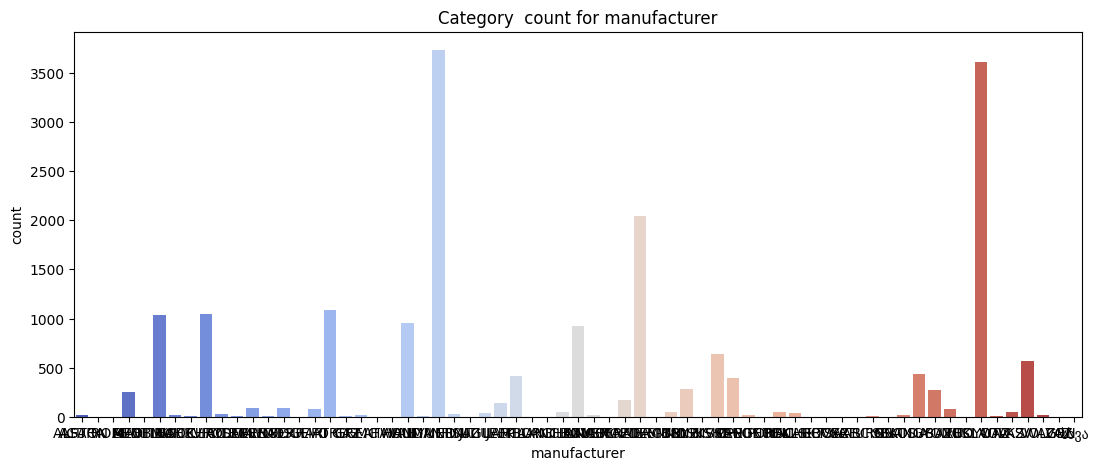

/var/folders/kx/n6bh82zd3w5_blhwkxh6d2440000gn/T/ipykernel_14014/566236751.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="coolwarm")


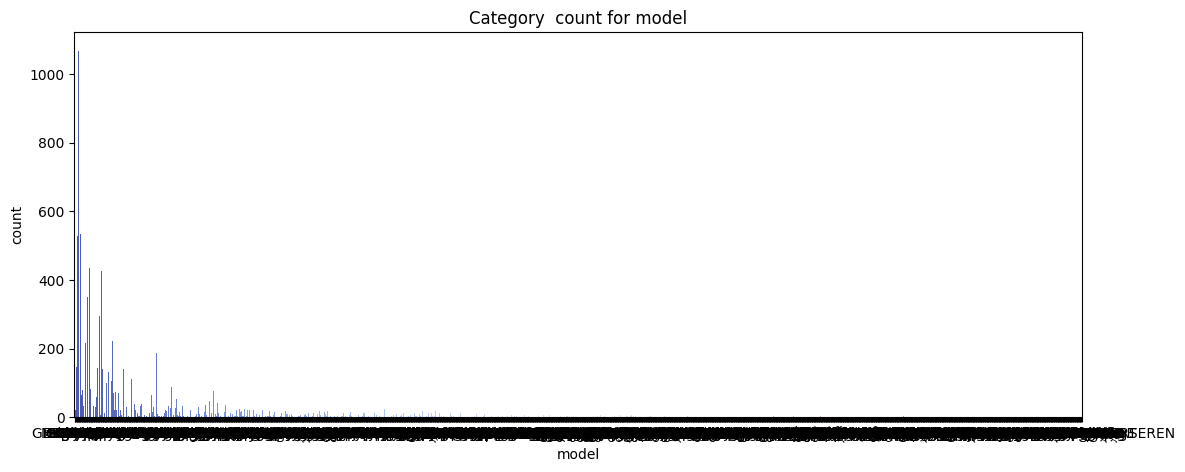

/var/folders/kx/n6bh82zd3w5_blhwkxh6d2440000gn/T/ipykernel_14014/566236751.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="coolwarm")


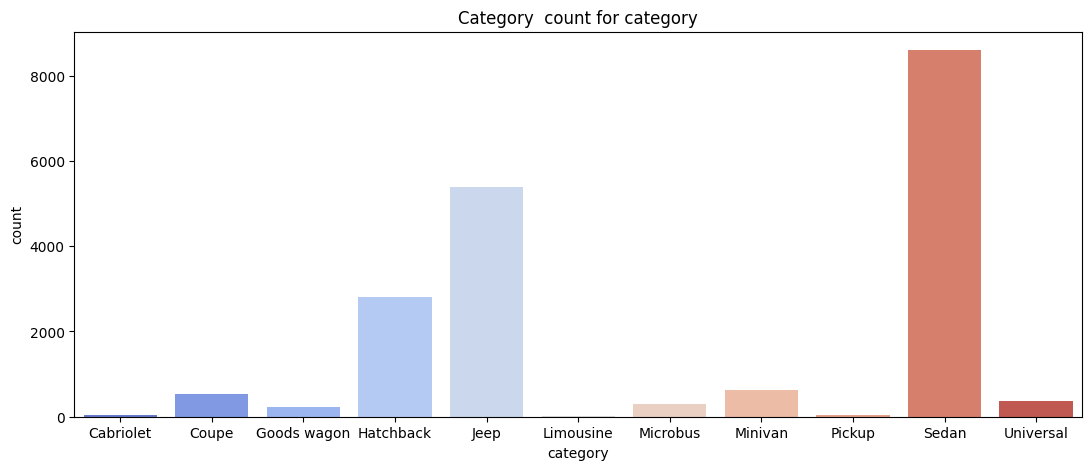

/var/folders/kx/n6bh82zd3w5_blhwkxh6d2440000gn/T/ipykernel_14014/566236751.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="coolwarm")


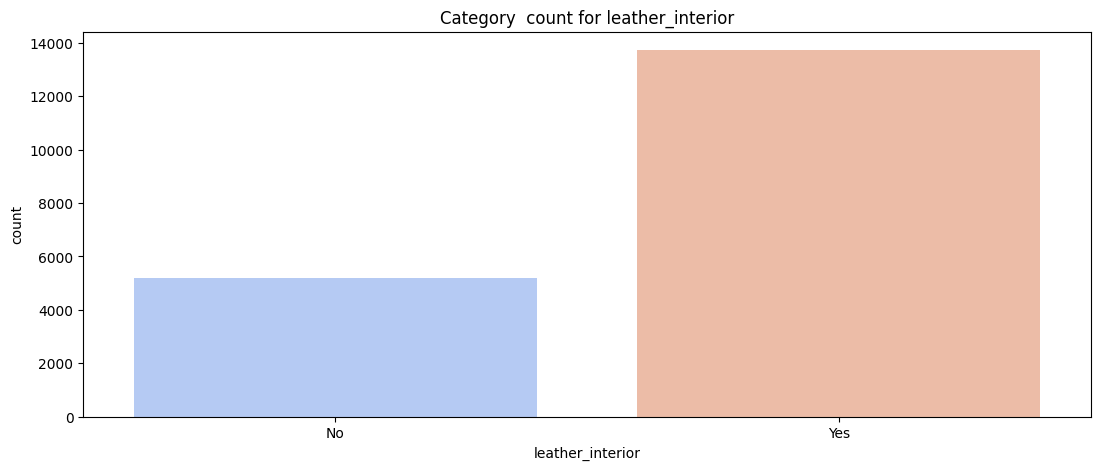

/var/folders/kx/n6bh82zd3w5_blhwkxh6d2440000gn/T/ipykernel_14014/566236751.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="coolwarm")


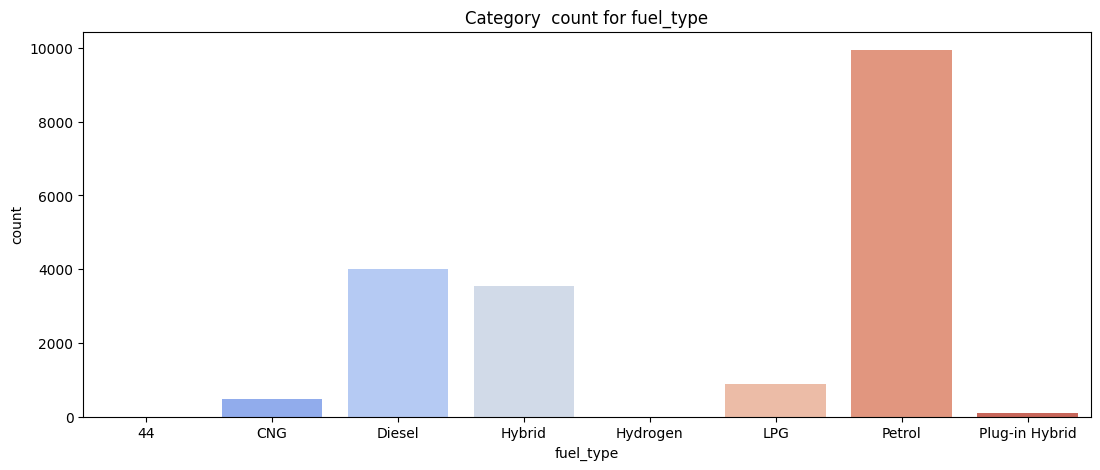

/var/folders/kx/n6bh82zd3w5_blhwkxh6d2440000gn/T/ipykernel_14014/566236751.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="coolwarm")


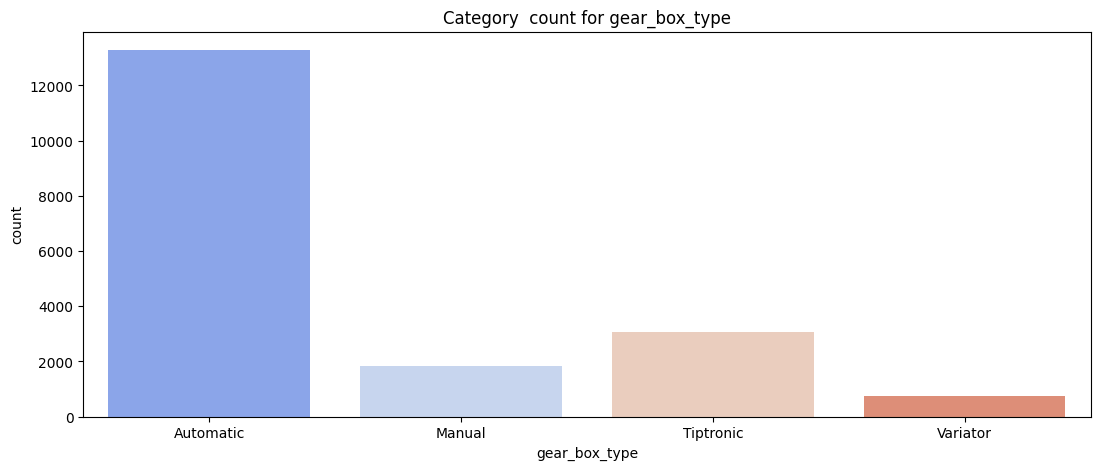

/var/folders/kx/n6bh82zd3w5_blhwkxh6d2440000gn/T/ipykernel_14014/566236751.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="coolwarm")


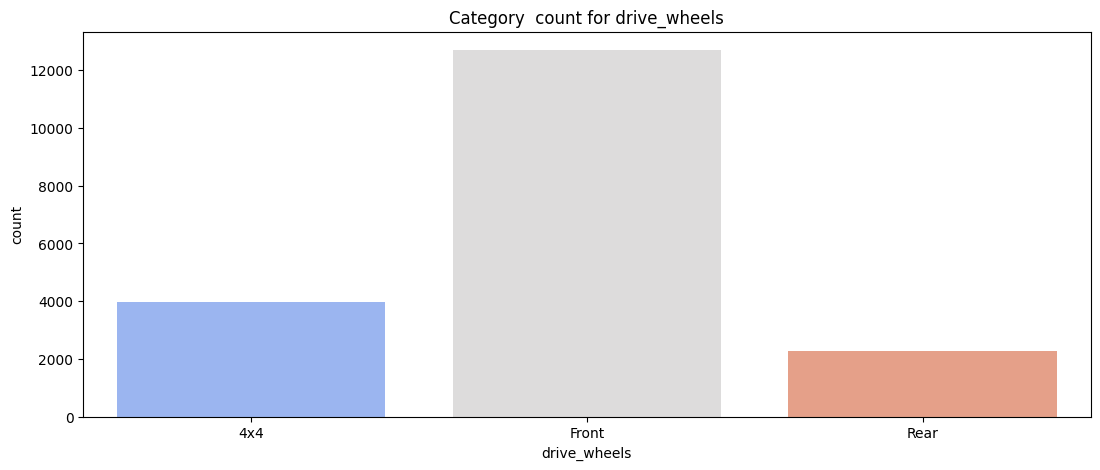

/var/folders/kx/n6bh82zd3w5_blhwkxh6d2440000gn/T/ipykernel_14014/566236751.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="coolwarm")


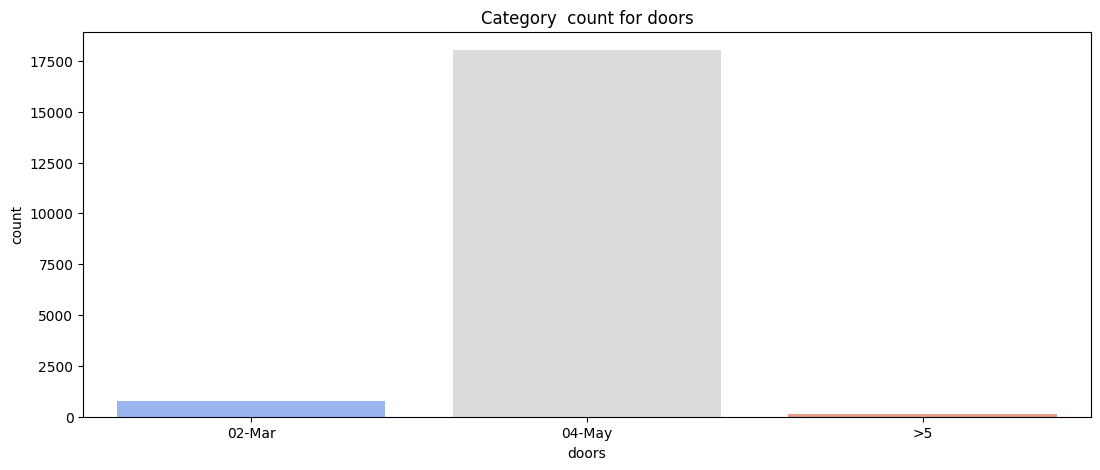

/var/folders/kx/n6bh82zd3w5_blhwkxh6d2440000gn/T/ipykernel_14014/566236751.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="coolwarm")


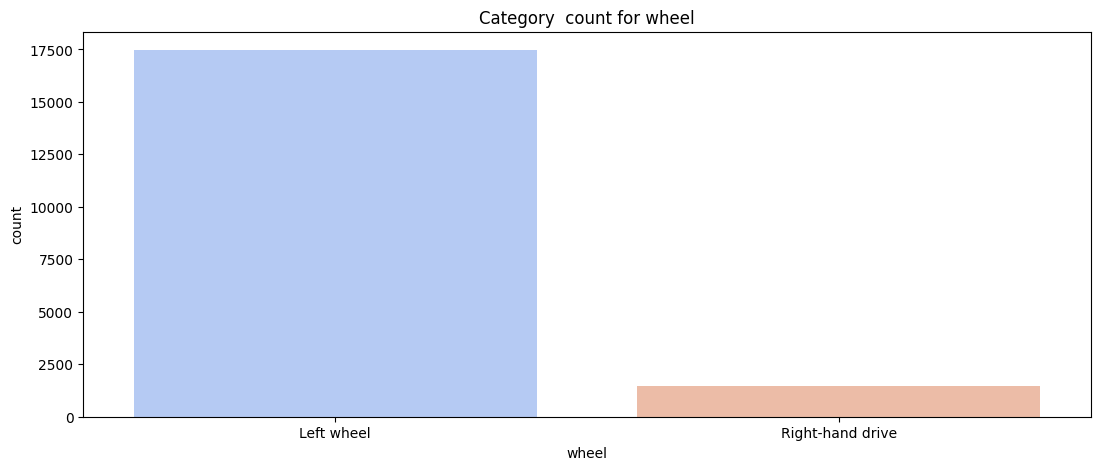

/var/folders/kx/n6bh82zd3w5_blhwkxh6d2440000gn/T/ipykernel_14014/566236751.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="coolwarm")


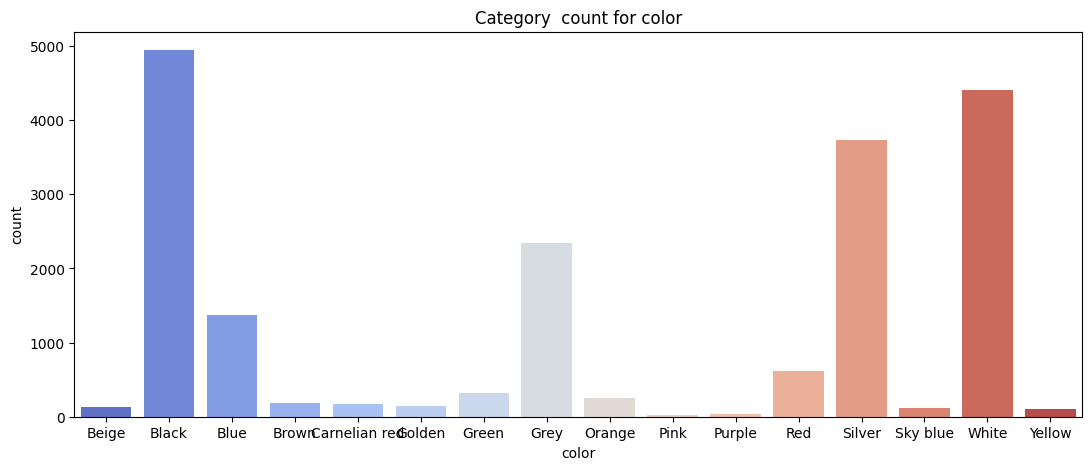

In [26]:
# visualization for categorical columns
# Barchart

for col in categorical_col:
    plt.figure(figsize=(13,5))
    sns.countplot(x=df[col],palette="coolwarm")
    plt.title(f"Category  count for {col}")
    plt.show()

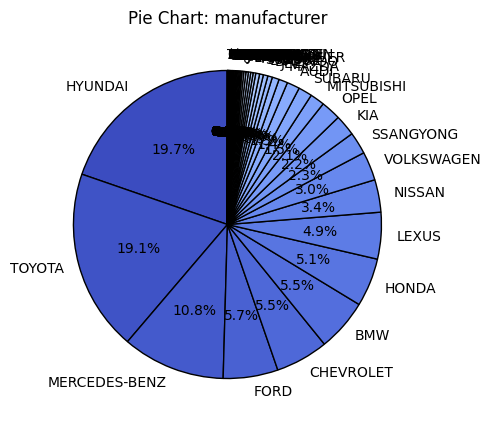

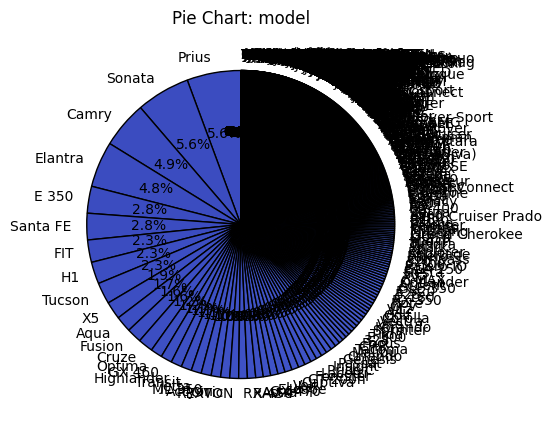

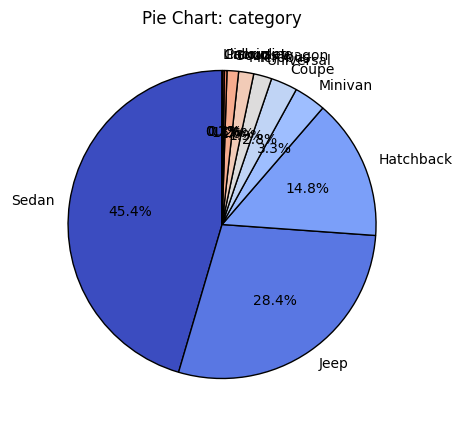

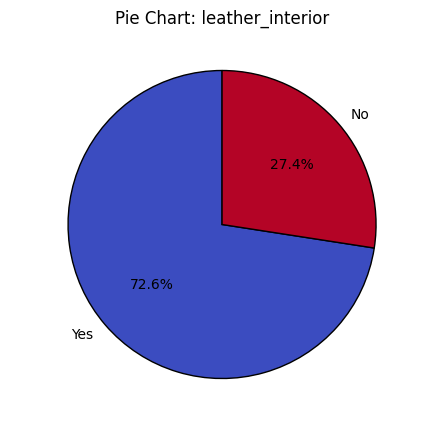

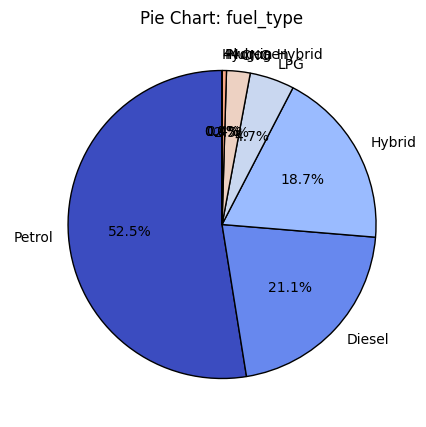

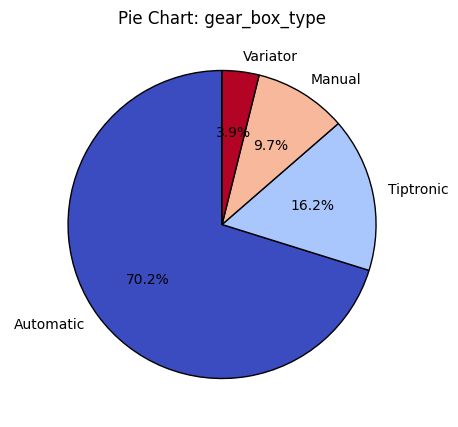

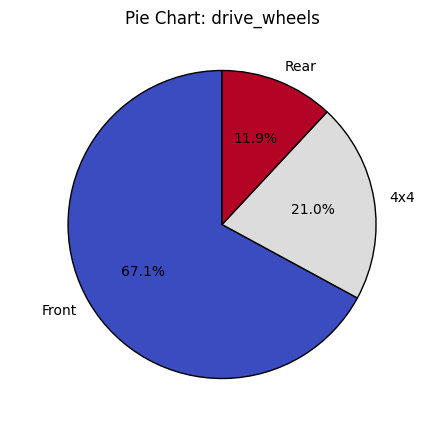

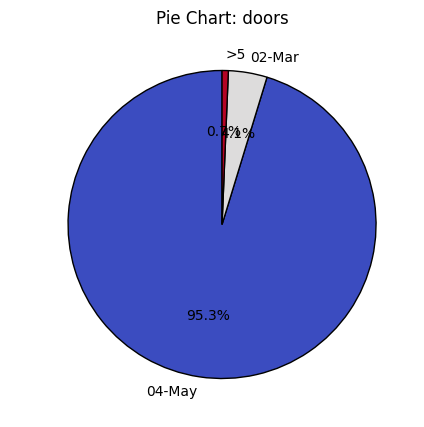

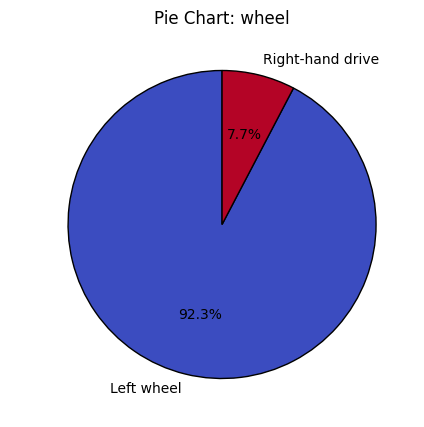

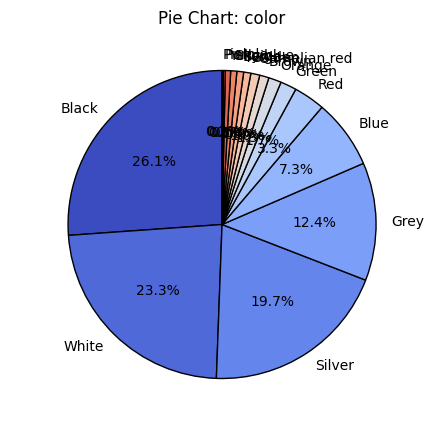

In [ ]:
# Pie chart for categorical columns

for col in categorical_col:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,2)
    df[col].value_counts().plot.pie(autopct="%1.1f%%",cmap="coolwarm",startangle=90,wedgeprops={"edgecolor": "black"})
    plt.title(f"Pie Chart: {col}")
    plt.ylabel(" ")
    plt.show()

In [38]:
# Numerical columns

numerical_col=df.select_dtypes(include=["int8","int16","int32","Int64","float64"]).columns.tolist()
print(f"\nNUMERICAL COLUMNS:{numerical_col}")
print(f"TOTAL NUMBER OF NUMERICAL COLUMNS:{len(numerical_col)}") 




NUMERICAL COLUMNS:['id', 'price', 'levy', 'prod_year', 'engine_volume', 'mileage', 'cylinders', 'airbags']
TOTAL NUMBER OF NUMERICAL COLUMNS:8


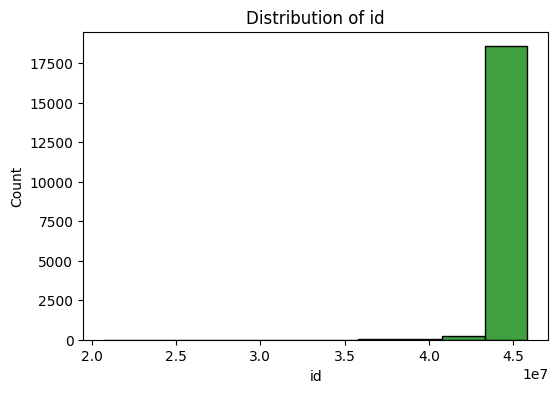

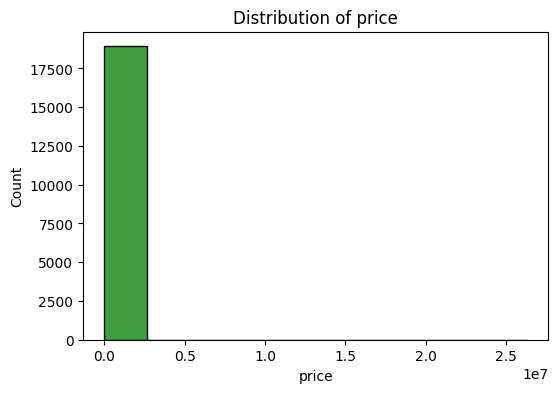

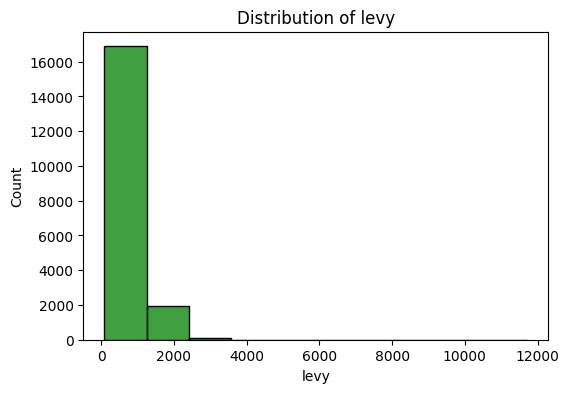

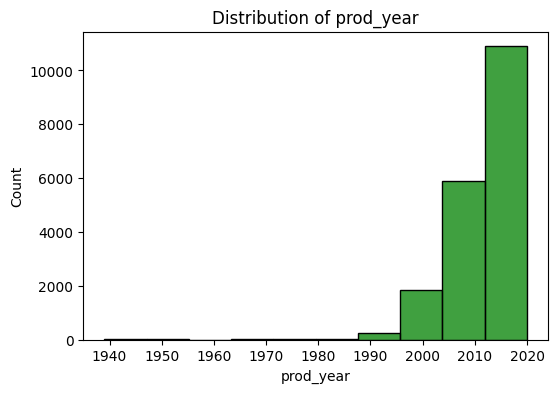

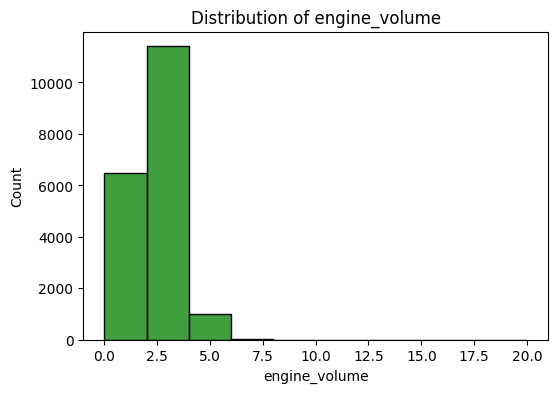

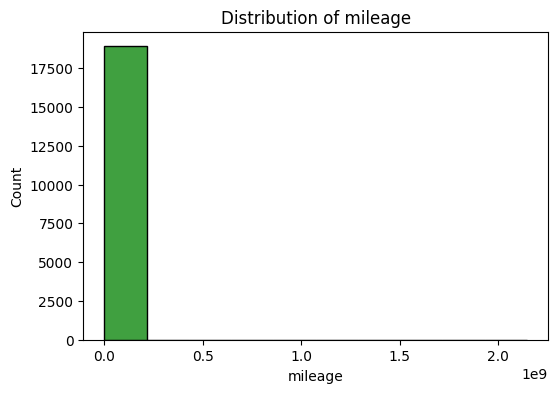

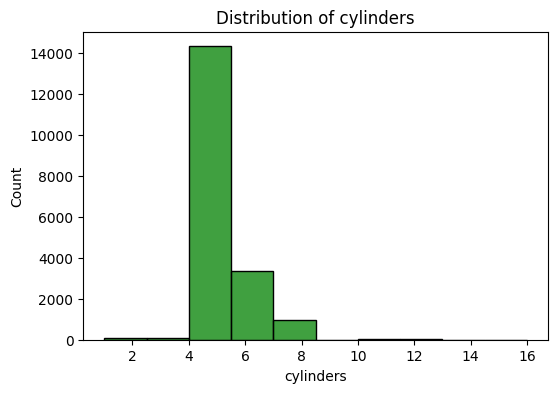

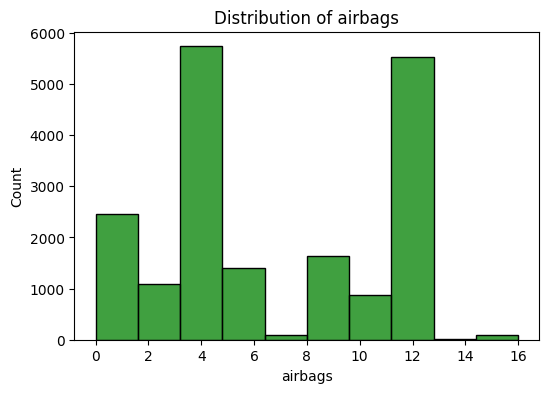

In [47]:
# Visualization for numerical columns

for col in numerical_col:
    plt.figure(figsize=(6,4))
    
    sns.histplot(df[col],bins=10, color="green")
    plt.title(f"Distribution of {col}")
    plt.show()

# Encoding

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18924 entries, 0 to 18923
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                18924 non-null  int32   
 1   price             18924 non-null  int32   
 2   levy              18924 non-null  float64 
 3   manufacturer      18924 non-null  category
 4   model             18924 non-null  string  
 5   prod_year         18924 non-null  int16   
 6   category          18924 non-null  category
 7   leather_interior  18924 non-null  category
 8   fuel_type         18924 non-null  category
 9   engine_volume     18924 non-null  float64 
 10  mileage           18924 non-null  Int64   
 11  cylinders         18924 non-null  int8    
 12  gear_box_type     18924 non-null  category
 13  drive_wheels      18924 non-null  category
 14  doors             18924 non-null  category
 15  wheel             18924 non-null  category
 16  color             1892

In [48]:
# Categorical columns

categorical_col=df.select_dtypes(include=["string","category"]).columns.tolist()
print(f"CATEGORICAL COLUMNS:\n{categorical_col}")
print(f"TOTAL NUMBER OF CATEGORICAL COLUMNS: {len(categorical_col)}")

CATEGORICAL COLUMNS:
['manufacturer', 'model', 'category', 'leather_interior', 'fuel_type', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color']
TOTAL NUMBER OF CATEGORICAL COLUMNS: 10


In [50]:
# Finding cardinality

cardinality=df[categorical_col].nunique()
print(cardinality)

manufacturer          65
model               1590
category              11
leather_interior       2
fuel_type              8
gear_box_type          4
drive_wheels           3
doors                  3
wheel                  2
color                 16
dtype: int64


In [ ]:
# Label encoding

label_encoder=LabelEncoder()
encoding_columns=["manufacturer","model","color"] # Cardinalitysi yuqori bo'lgan columnlarni belgilab olib ularni label encoding qildim
for col in encoding_columns:
    df[col]=label_encoder.fit_transform(df[col])


In [60]:
df["manufacturer"]

0        32
1         8
2        21
3        16
4        21
         ..
18919    36
18920    23
18921    23
18922     8
18923    23
Name: manufacturer, Length: 18924, dtype: int64

In [61]:
# Categorical columns
# 10 tadan 7 taga kamaydi
categorical_col=df.select_dtypes(include=["string","category"]).columns.tolist()
print(f"CATEGORICAL COLUMNS:\n{categorical_col}")
print(f"TOTAL NUMBER OF CATEGORICAL COLUMNS: {len(categorical_col)}")

CATEGORICAL COLUMNS:
['category', 'leather_interior', 'fuel_type', 'gear_box_type', 'drive_wheels', 'doors', 'wheel']
TOTAL NUMBER OF CATEGORICAL COLUMNS: 7


In [62]:
#One-Hot encoding (with get_dummies)

one_hot_encoder=pd.get_dummies(df,columns=categorical_col,drop_first=True)
one_hot_encoder





,id,price,levy,manufacturer,model,prod_year,engine_volume,mileage,cylinders,color,...,fuel_type_Petrol,fuel_type_Plug-in Hybrid,gear_box_type_Manual,gear_box_type_Tiptronic,gear_box_type_Variator,drive_wheels_Front,drive_wheels_Rear,doors_04-May,doors_>5,wheel_Right-hand drive
0,45654403,13328,1399.000000,32,1242,2010,3.5,186005,6,12,...,False,False,False,False,False,False,False,True,False,False
1,44731507,16621,1018.000000,8,658,2011,3.0,192000,6,1,...,True,False,False,True,False,False,False,True,False,False
2,45774419,8467,906.309899,21,684,2006,1.3,200000,4,1,...,True,False,False,False,True,True,False,True,False,True
3,45769185,3607,862.000000,16,661,2011,2.5,168966,4,14,...,False,False,False,False,False,False,False,True,False,False
4,45809263,11726,446.000000,21,684,2014,1.3,91901,4,12,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18919,45798355,8467,906.309899,36,385,1999,2.0,300000,4,12,...,False,False,True,False,False,False,True,False,False,False
18920,45778856,15681,831.000000,23,1334,2011,2.4,161600,4,11,...,True,False,False,True,False,True,False,True,False,False
18921,45804997,26108,836.000000,23,1442,2010,2.0,116365,4,7,...,False,False,False,False,False,True,False,True,False,False
18922,45793526,5331,1288.000000,8,456,2007,2.0,51258,4,1,...,False,False,False,False,False,True,False,True,False,False


In [63]:
df=one_hot_encoder.astype(int) # encoding natijasida qo'shilgan yangi ustunlarni type ni boolean dan int type ga o'tkazdim

In [64]:
df.head()

,id,price,levy,manufacturer,model,prod_year,engine_volume,mileage,cylinders,color,...,fuel_type_Petrol,fuel_type_Plug-in Hybrid,gear_box_type_Manual,gear_box_type_Tiptronic,gear_box_type_Variator,drive_wheels_Front,drive_wheels_Rear,doors_04-May,doors_>5,wheel_Right-hand drive
0,45654403,13328,1399,32,1242,2010,3,186005,6,12,...,0,0,0,0,0,0,0,1,0,0
1,44731507,16621,1018,8,658,2011,3,192000,6,1,...,1,0,0,1,0,0,0,1,0,0
2,45774419,8467,906,21,684,2006,1,200000,4,1,...,1,0,0,0,1,1,0,1,0,1
3,45769185,3607,862,16,661,2011,2,168966,4,14,...,0,0,0,0,0,0,0,1,0,0
4,45809263,11726,446,21,684,2014,1,91901,4,12,...,1,0,0,0,0,1,0,1,0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18924 entries, 0 to 18923
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   id                        18924 non-null  int64
 1   price                     18924 non-null  int64
 2   levy                      18924 non-null  int64
 3   manufacturer              18924 non-null  int64
 4   model                     18924 non-null  int64
 5   prod_year                 18924 non-null  int64
 6   engine_volume             18924 non-null  int64
 7   mileage                   18924 non-null  int64
 8   cylinders                 18924 non-null  int64
 9   color                     18924 non-null  int64
 10  airbags                   18924 non-null  int64
 11  category_Coupe            18924 non-null  int64
 12  category_Goods wagon      18924 non-null  int64
 13  category_Hatchback        18924 non-null  int64
 14  category_Jeep             18924 non-nu

# Scaling

In [66]:
# scaling with StandardScaler

standard_scaler=StandardScaler()
df_standard_scaled=pd.DataFrame(standard_scaler.fit_transform(df),columns=df.columns)
df=df_standard_scaled

In [67]:
df.tail(2)

,id,price,levy,manufacturer,model,prod_year,engine_volume,mileage,cylinders,color,...,fuel_type_Petrol,fuel_type_Plug-in Hybrid,gear_box_type_Manual,gear_box_type_Tiptronic,gear_box_type_Variator,drive_wheels_Front,drive_wheels_Rear,doors_04-May,doors_>5,wheel_Right-hand drive
18922,0.232682,-0.068997,0.986163,-1.410441,-0.988429,-0.690878,0.071525,-0.030821,-0.483436,-1.263042,...,-1.052195,-0.067171,-0.328577,-0.43962,-0.200735,0.700475,-0.368269,0.222413,-0.081214,-0.288386
18923,0.253745,-0.094298,-0.395764,-0.567123,1.147928,0.191642,0.071525,-0.028041,-0.483436,1.161511,...,-1.052195,-0.067171,-0.328577,-0.43962,-0.200735,0.700475,-0.368269,0.222413,-0.081214,-0.288386
